<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

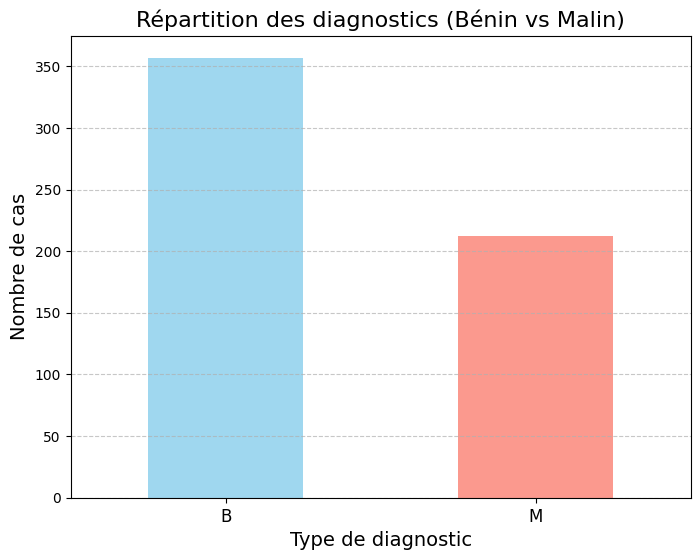

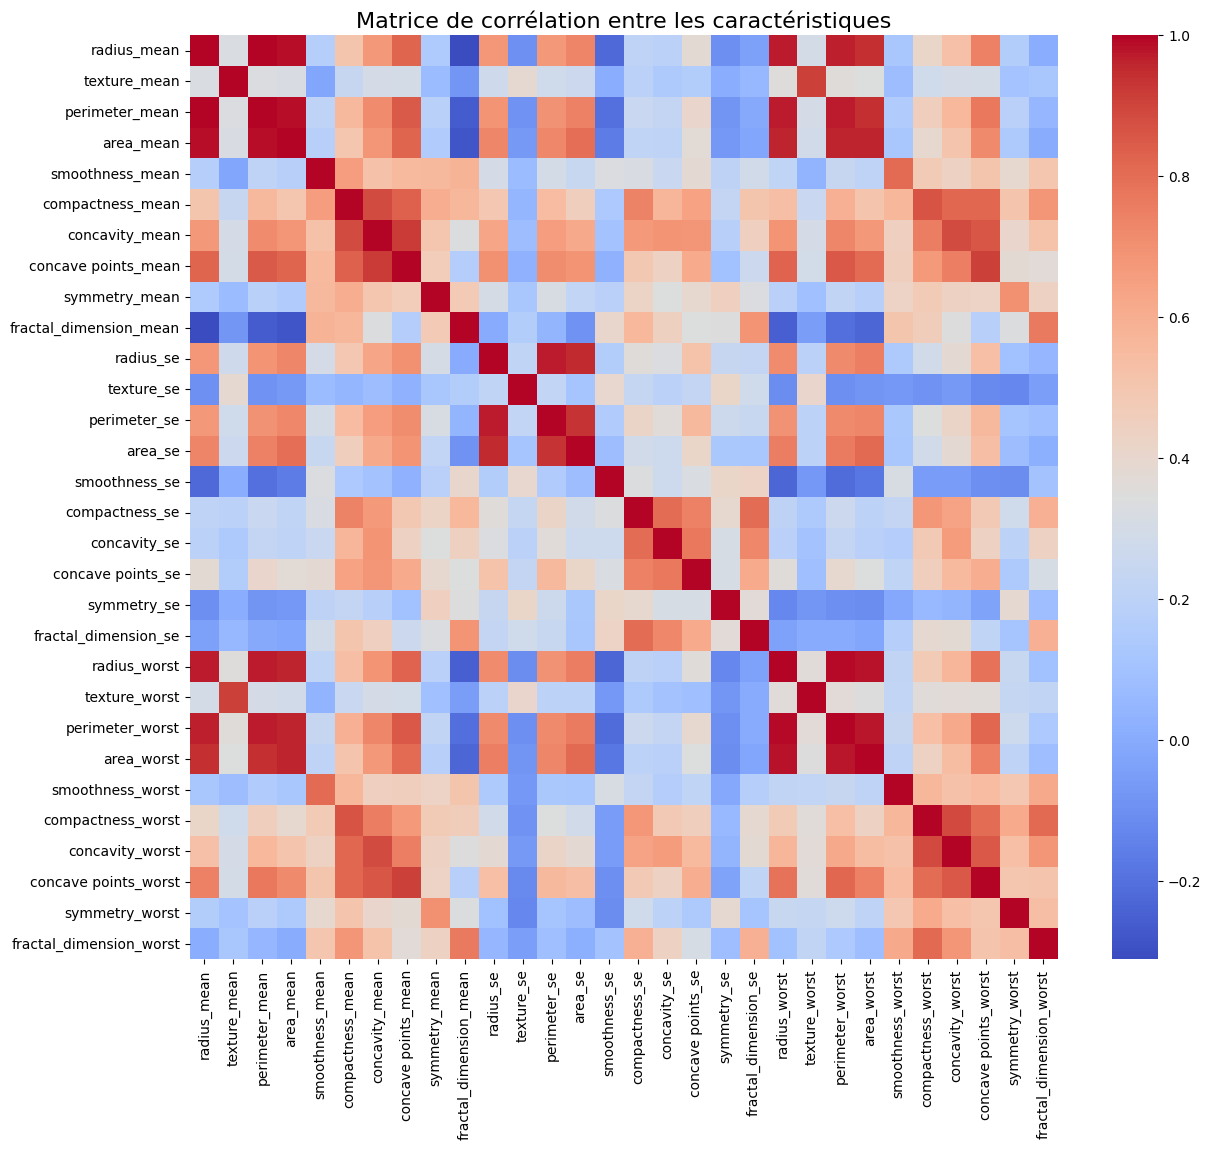

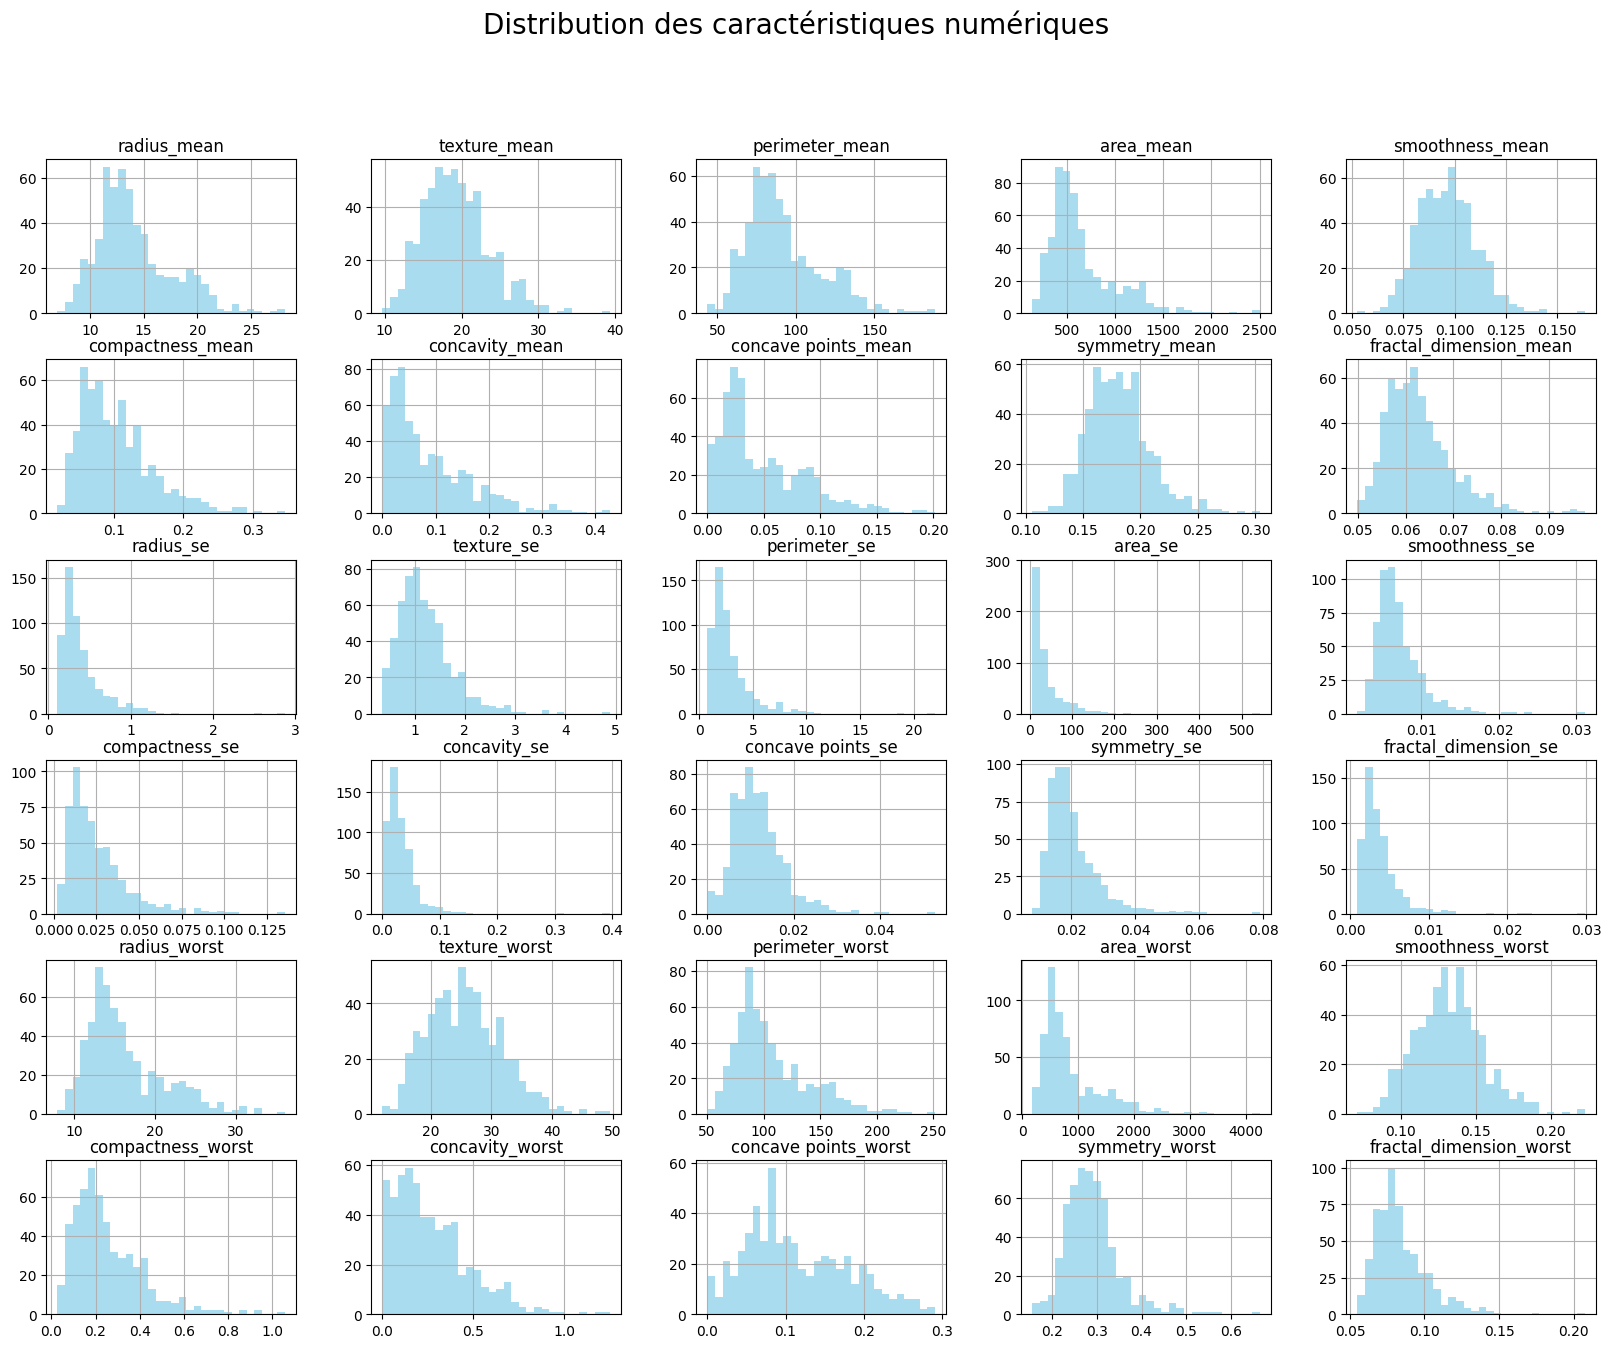

C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3167804698.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3167804698.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3167804698.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3167804698.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3167804698.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3167804698.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppData\Local\Temp\ipykernel_7480\3167804698.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\taral\AppDa

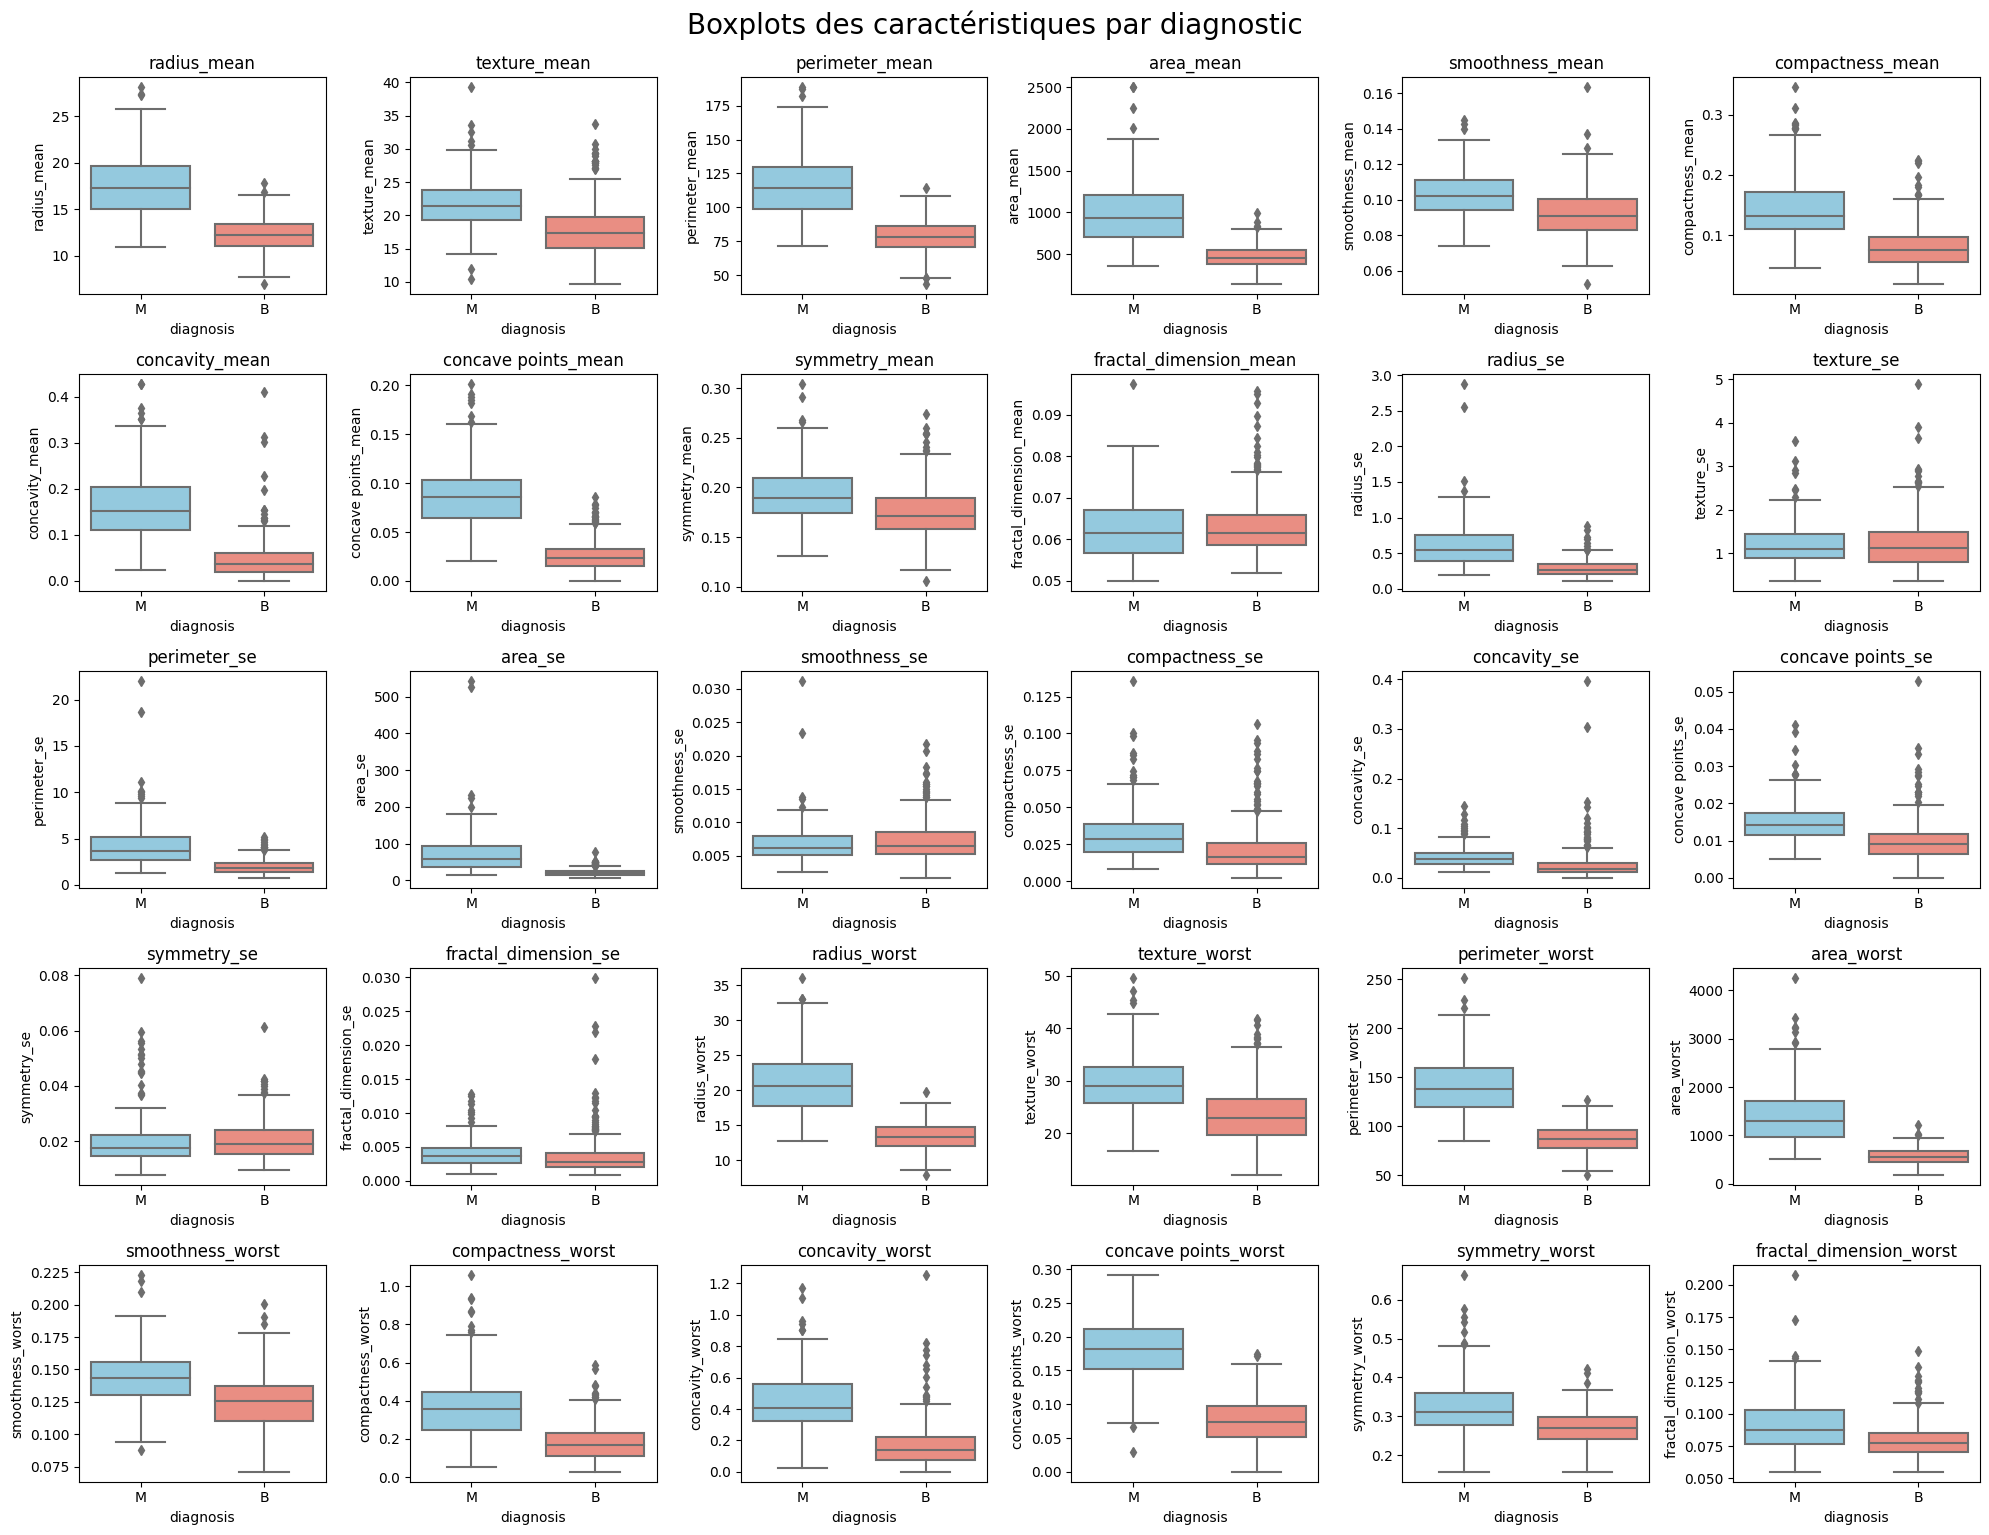

C:\Users\taral\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


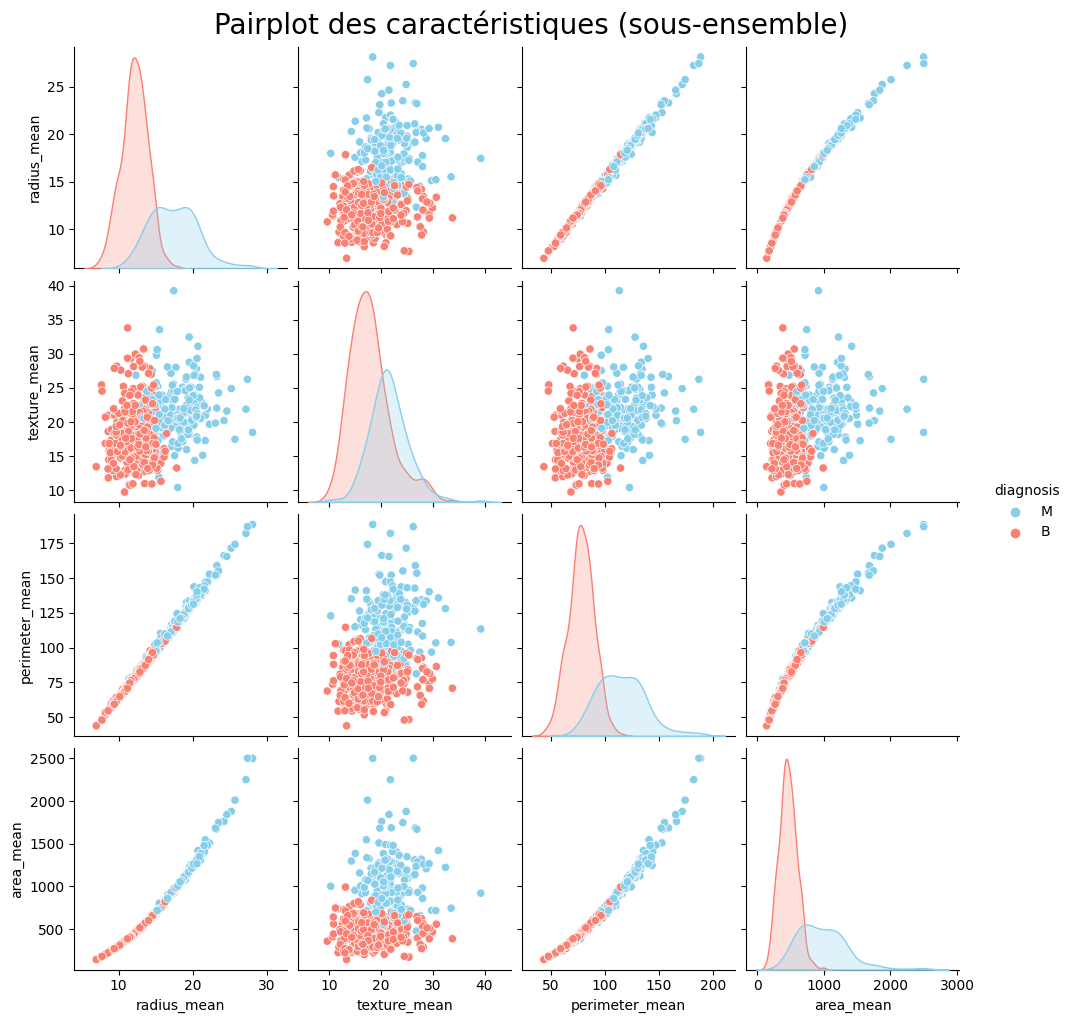

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chargement du fichier
file_path = 'bcw_data.csv'

# Lecture des données
data = pd.read_csv(file_path)

# Aperçu des premières lignes du dataset
data.head(), data.info(), data.describe()

# Explication:
# - `data.head()` affiche les 5 premières lignes du dataset pour un aperçu rapide des données.
# - `data.info()` fournit des informations sur le type de données et les valeurs manquantes.
# - `data.describe()` donne des statistiques descriptives des colonnes numériques.

# Suppression des colonnes inutiles
data_cleaned = data.drop(columns=["Unnamed: 32", "id"])

# Explication:
# - Les colonnes "Unnamed: 32" et "id" sont supprimées car elles ne sont pas pertinentes pour l'analyse.
# - "id" est un identifiant unique qui n'apporte pas d'information utile pour la modélisation.

# Aperçu de la répartition des diagnostics
diagnosis_distribution = data_cleaned["diagnosis"].value_counts()

# Résultat pour vérifier
data_cleaned.head(), diagnosis_distribution

# Explication:
# - `value_counts()` est utilisé pour compter le nombre d'occurrences de chaque type de diagnostic (Bénin 'B' ou Malin 'M').
# - Cela nous aide à comprendre la distribution de la variable cible.

# Visualisation de la répartition des diagnostics
plt.figure(figsize=(8, 6))
diagnosis_distribution.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
plt.title('Répartition des diagnostics (Bénin vs Malin)', fontsize=16)
plt.xlabel('Type de diagnostic', fontsize=14)
plt.ylabel('Nombre de cas', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Explication:
# - Un graphique à barres est utilisé pour visualiser la répartition des diagnostics.
# - Cela montre combien de cas sont bénins (B) et combien sont malins (M).
# - Une distribution équilibrée est souhaitable pour la modélisation, mais ce n'est pas toujours le cas.

# Calcul des corrélations entre les variables numériques
correlation_matrix = data_cleaned.drop(columns=["diagnosis"]).corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar=True)
plt.title('Matrice de corrélation entre les caractéristiques', fontsize=16)
plt.show()

# Explication:
# - La matrice de corrélation montre la relation linéaire entre les caractéristiques numériques.
# - Des valeurs proches de 1 ou -1 indiquent une forte corrélation positive ou négative, respectivement.
# - Cela peut aider à identifier les caractéristiques redondantes.

# Analyse univariée: Distribution des caractéristiques numériques
data_cleaned.drop(columns=["diagnosis"]).hist(bins=30, figsize=(20, 15), color='skyblue', alpha=0.7)
plt.suptitle('Distribution des caractéristiques numériques', fontsize=20)
plt.show()

# Explication:
# - Les histogrammes montrent la distribution de chaque caractéristique numérique.
# - Cela aide à identifier les caractéristiques qui peuvent nécessiter une transformation (par exemple, normalisation).

# Analyse bivariée: Boxplots pour visualiser la distribution des caractéristiques par diagnostic
plt.figure(figsize=(20, 15))
for i, column in enumerate(data_cleaned.columns[1:], 1):
    plt.subplot(5, 6, i)
    sns.boxplot(x='diagnosis', y=column, data=data_cleaned, palette=['skyblue', 'salmon'])
    plt.title(column)
    plt.tight_layout()
plt.suptitle('Boxplots des caractéristiques par diagnostic', fontsize=20, y=1.02)
plt.show()

# Explication:
# - Les boxplots montrent la distribution des caractéristiques pour chaque type de diagnostic.
# - Cela permet de voir si certaines caractéristiques diffèrent significativement entre les diagnostics bénins et malins.

# Analyse multivariée: Pairplot pour visualiser les relations entre les caractéristiques
sns.pairplot(data_cleaned, vars=data_cleaned.columns[1:5], hue='diagnosis', palette=['skyblue', 'salmon'], diag_kind='kde')
plt.suptitle('Pairplot des caractéristiques (sous-ensemble)', fontsize=20, y=1.02)
plt.show()

# Explication:
# - Le pairplot montre les relations entre les caractéristiques et leur distribution par diagnostic.
# - Cela aide à identifier les relations non linéaires et les interactions potentielles entre les caractéristiques.

# Préparation des données pour le modèle: Encodage de la variable cible
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'B': 0, 'M': 1})

# Explication:
# - La variable cible 'diagnosis' est encodée en valeurs numériques (0 pour Bénin, 1 pour Malin) pour la modélisation.

# Normalisation des caractéristiques
scaler = StandardScaler()
features = data_cleaned.drop(columns=["diagnosis"])
features_scaled = scaler.fit_transform(features)

# Conversion en DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Explication:
# - Les caractéristiques sont normalisées pour avoir une moyenne de 0 et un écart-type de 1.
# - Cela est important pour certains algorithmes de machine learning qui sont sensibles à l'échelle des données.

# Modélisation: Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, data_cleaned['diagnosis'], test_size=0.2, random_state=42)

# Explication:
# - Les données sont divisées en ensembles d'entraînement (80%) et de test (20%).
# - Cela permet d'évaluer la performance du modèle sur des données non vues.

# Entraînement d'un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Explication:
# - Un modèle de régression logistique est entraîné sur les données d'entraînement.
# - C'est un modèle de classification binaire approprié pour ce type de problème.

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Explication:
# - L'accuracy mesure le pourcentage de prédictions correctes.
# - Le rapport de classification fournit des métriques comme la précision, le rappel, et le F1-score.
# - La matrice de confusion montre le nombre de vrais positifs, vrais négatifs, faux positifs, et faux négatifs.
